### Dense Retrieval

Now we have created embeddings in earlier leccture. Now we will learn how we can use in semantic search 

In [8]:
import os
from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file
import cohere
co = cohere.Client(os.environ['COHERE_API_KEY'])

import weaviate
auth_config = weaviate.auth.AuthApiKey(
    api_key=os.environ['WEAVIATE_API_KEY'])

client = weaviate.Client(
    url=os.environ['WEAVIATE_API_URL'],
    auth_client_secret=auth_config,
    additional_headers={
        "X-Cohere-Api-Key": os.environ['COHERE_API_KEY'],
    }
)
client.is_ready() #check if True

True

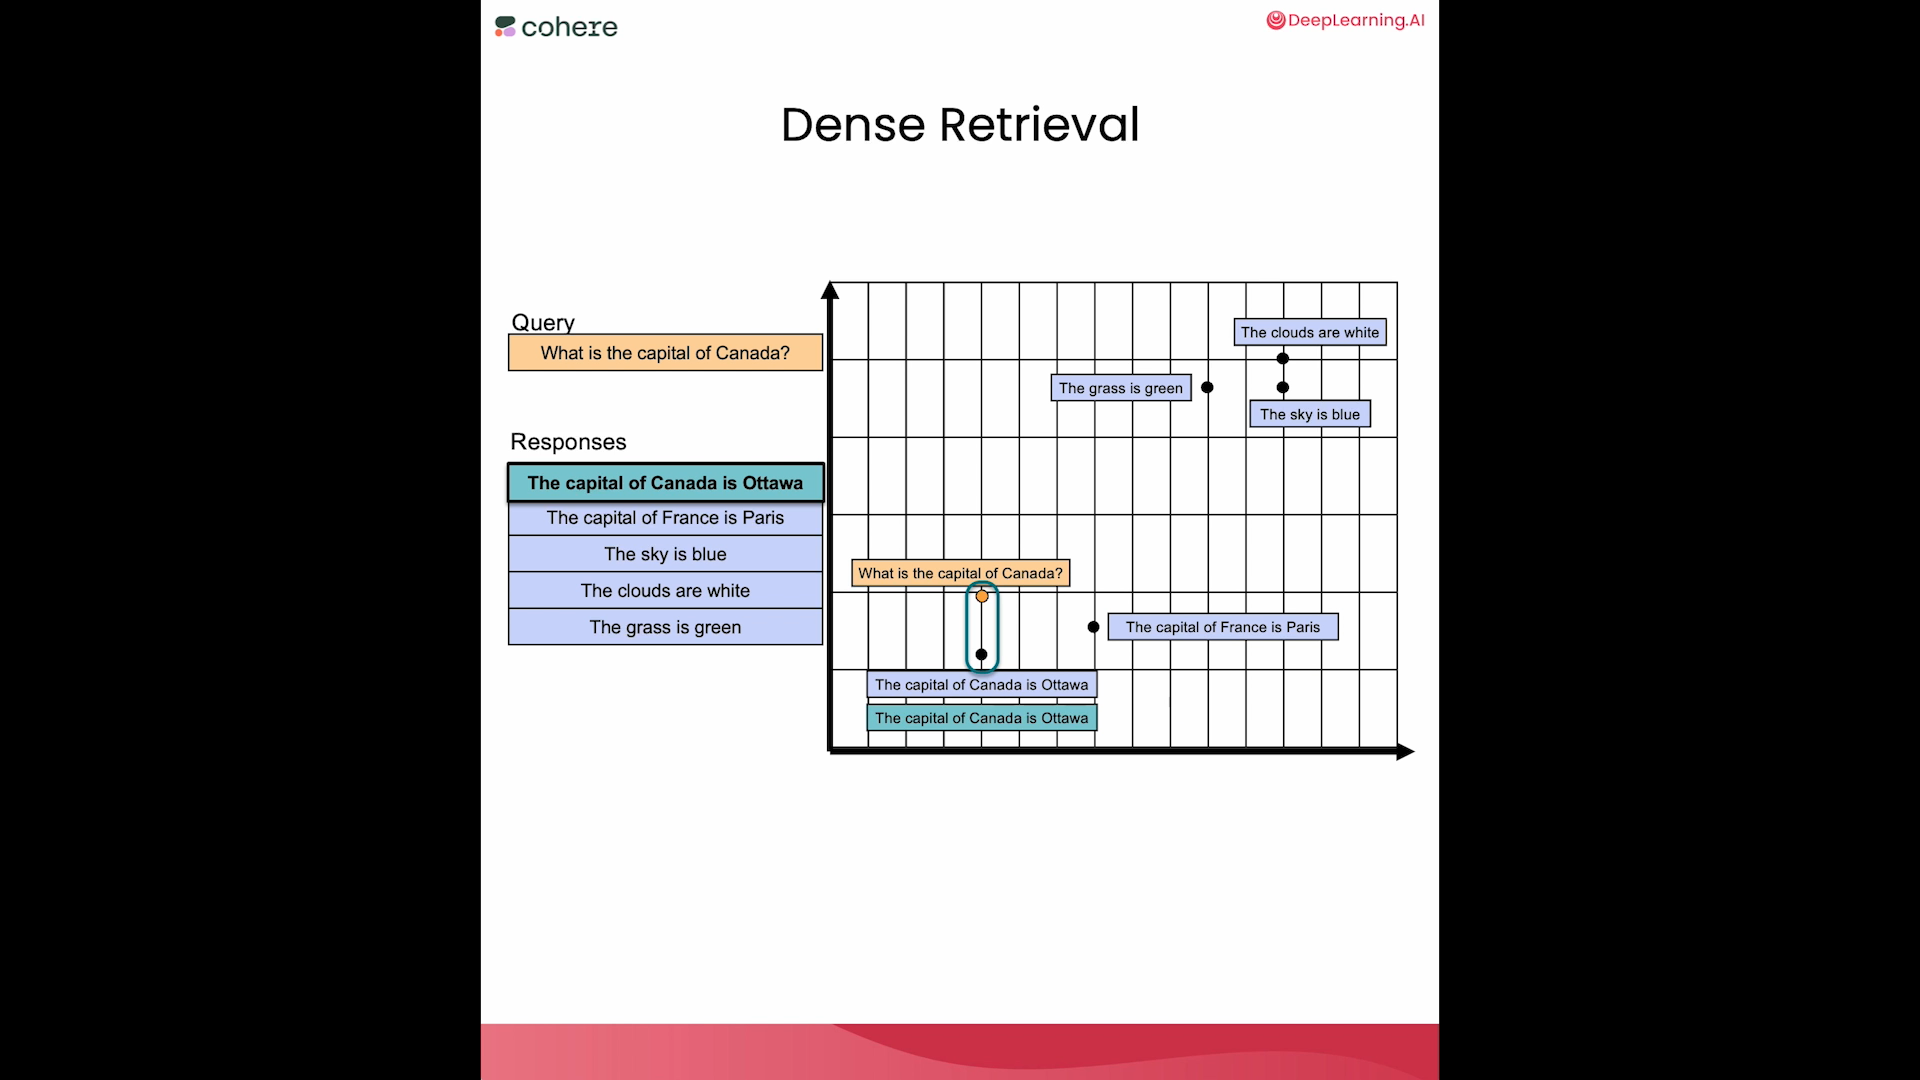

### Part 1: Vector Database for semantic Search (Dense Retrieval)

In [3]:
def dense_retrieval(query, 
                    results_lang='en', 
                    properties = ["text", "title", "url", "views", "lang", "_additional {distance}"],
                    num_results=5):

    nearText = {"concepts": [query]}
    
    # To filter by language
    where_filter = {
    "path": ["lang"],
    "operator": "Equal",
    "valueString": results_lang
    }
    response = (
        client.query
        .get("Articles", properties)
        .with_near_text(nearText)
        .with_where(where_filter)
        .with_limit(num_results)
        .do()
    )

    result = response['data']['Get']['Articles']

    return result

def print_result(result):
    """ Print results with colorful formatting """
    for i,item in enumerate(result):
        print(f'item {i}')
        for key in item.keys():
            print(f"{key}:{item.get(key)}")
            print()
        print()

### Bacic Query

In [5]:
query = "Who wrote Hamlet?"
dense_retrieval_results = dense_retrieval(query)
print_result(dense_retrieval_results)

item 0
_additional:{'distance': -154.75615}

lang:en

text:There are many works that have been pointed to as possible sources for Shakespeare's play—from ancient Greek tragedies to Elizabethan plays. The editors of the Arden Shakespeare question the idea of "source hunting", pointing out that it presupposes that authors always require ideas from other works for their own, and suggests that no author can have an original idea or be an originator. When Shakespeare wrote there were many stories about sons avenging the murder of their fathers, and many about clever avenging sons pretending to be foolish in order to outsmart their foes. This would include the story of the ancient Roman, Lucius Junius Brutus, which Shakespeare apparently knew, as well as the story of Amleth, which was preserved in Latin by 13th-century chronicler Saxo Grammaticus in his "Gesta Danorum", and printed in Paris in 1514. The Amleth story was subsequently adapted and then published in French in 1570 by the 16th-ce

### Medium Query

In [6]:
query = "What is the capital of Canada?"
dense_retrieval_results = dense_retrieval(query)
print_result(dense_retrieval_results)

item 0
_additional:{'distance': -150.8031}

lang:en

text:The governor general of the province had designated Kingston as the capital in 1841. However, the major population centres of Toronto and Montreal, as well as the former capital of Lower Canada, Quebec City, all had legislators dissatisfied with Kingston. Anglophone merchants in Quebec were the main group supportive of the Kingston arrangement. In 1842, a vote rejected Kingston as the capital, and study of potential candidates included the then-named Bytown, but that option proved less popular than Toronto or Montreal. In 1843, a report of the Executive Council recommended Montreal as the capital as a more fortifiable location and commercial centre, however, the Governor General refused to execute a move without a parliamentary vote. In 1844, the Queen's acceptance of a parliamentary vote moved the capital to Montreal.

title:Ottawa

url:https://en.wikipedia.org/wiki?curid=22219

views:2000


item 1
_additional:{'distance': -150

In [17]:
def keyword_search(query,
                   results_lang='en',
                   properties = ["text", "title", "url", 
             "views", "lang"],
                   num_results=3):

    where_filter = {
    "path": ["lang"],
    "operator": "Equal",
    "valueString": results_lang
    }
    
    response = (
        client.query.get("Articles", properties)
        ## bm25 is keyword search or lexical search algorithm in weaviate
        .with_bm25(
            query=query
        )
        .with_where(where_filter)
        .with_limit(num_results)
        .do()
        )

    result = response['data']['Get']['Articles']
    return result

In [ ]:
query = "What is the capital of Canada"
keyword_search_results = keyword_search(query, client)
print_result(keyword_search_results)

Ans will not be relevant when you use keyword search

In [ ]:

query = "Tallest person in history?"
keyword_search_results = keyword_search(query, client)
print_result(keyword_search_results)

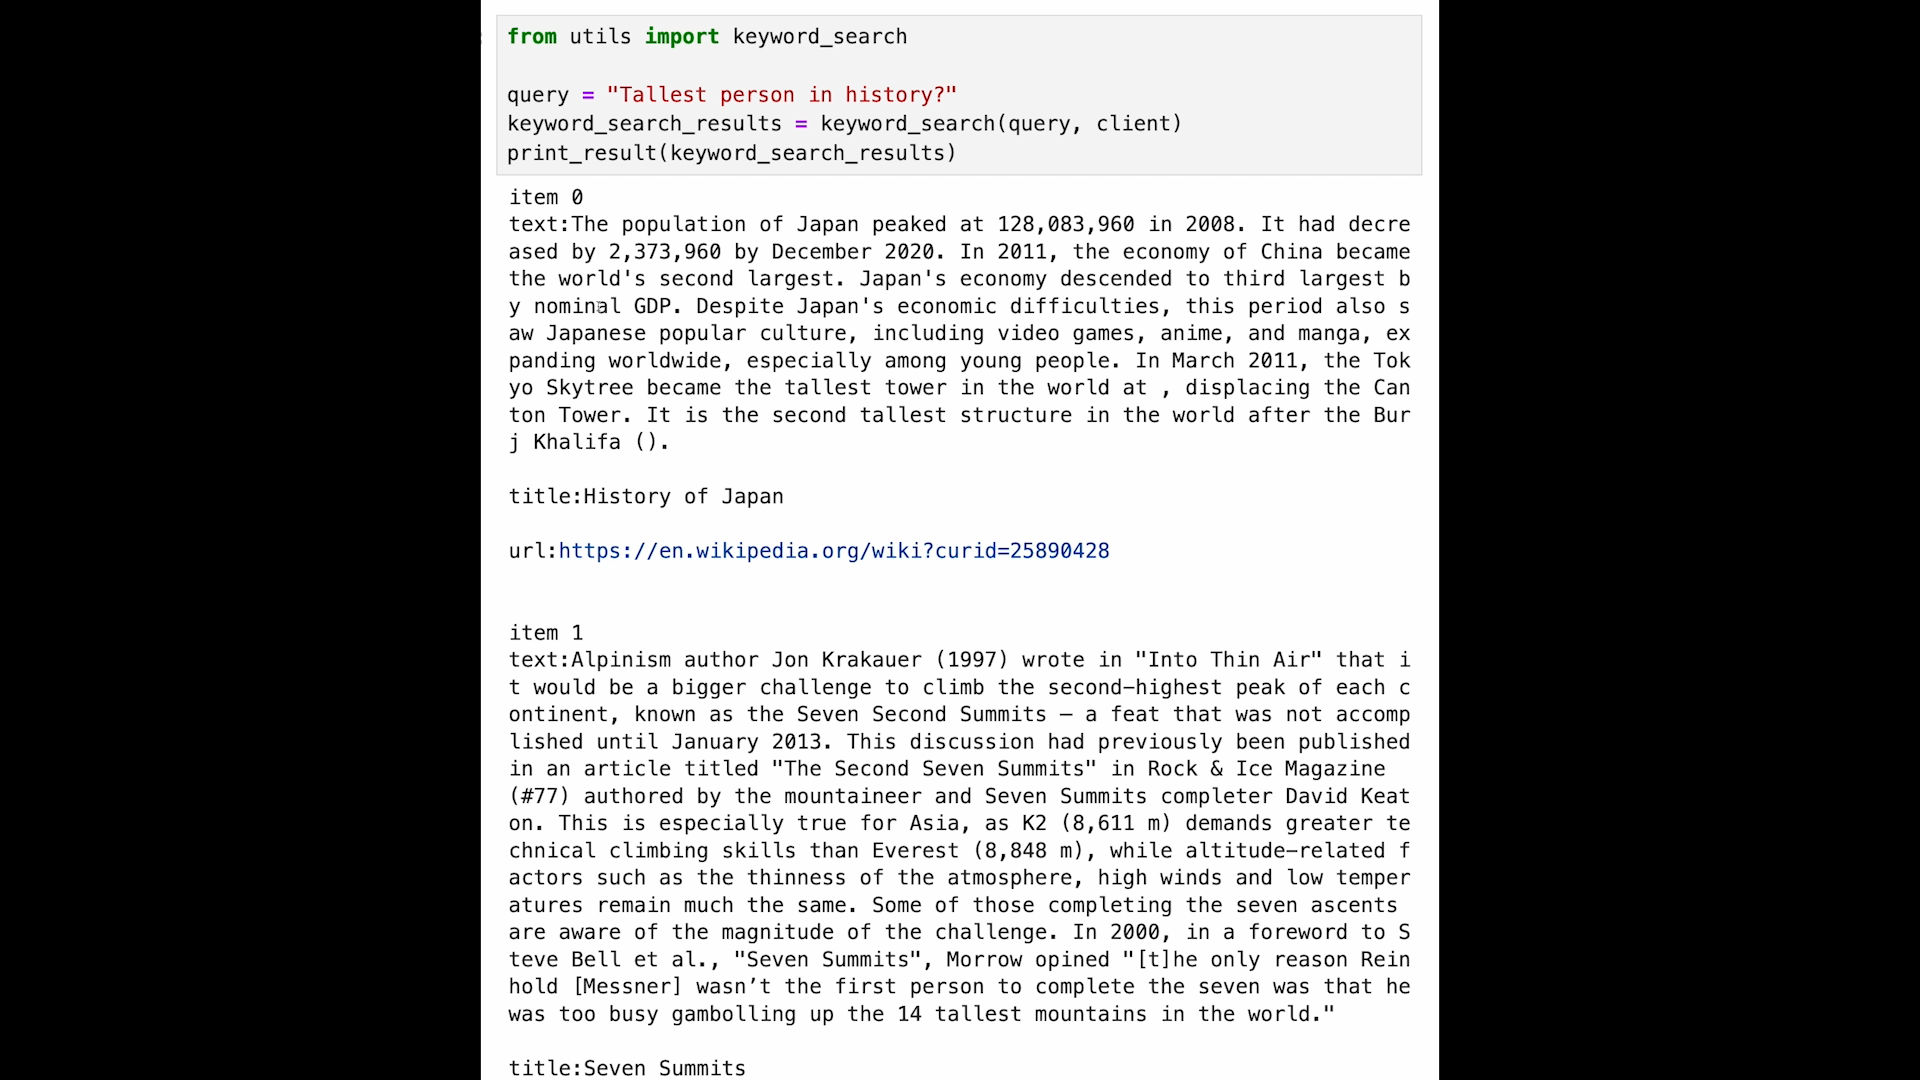

None of the ans of key word seearch is relevant

In [19]:
query = "Tallest person in history"
dense_retrieval_results = dense_retrieval(query)
print_result(dense_retrieval_results)

item 0
_additional:{'distance': -148.98888}

lang:en

text:Robert Pershing Wadlow (February 22, 1918 July 15, 1940), also known as the Alton Giant and the Giant of Illinois, was a man who was the tallest person in recorded history for whom there is irrefutable evidence. He was born and raised in Alton, Illinois, a small city near St. Louis, Missouri.

title:Robert Wadlow

url:https://en.wikipedia.org/wiki?curid=359117

views:3000


item 1
_additional:{'distance': -148.09317}

lang:en

text:Bol came from a family of extraordinarily tall men and women. He said: "My mother was , my father , and my sister is . And my great-grandfather was even taller—." His ethnic group, the Dinka, and the Nilotic people of which they are a part, are among the tallest populations in the world. Bol's hometown, Turalei, is the origin of other exceptionally tall people, including basketball player Ring Ayuel. "I was born in a village, where you cannot measure yourself," Bol reflected. "I learned I was 7 foot 

In [20]:
query = "أطول رجل في التاريخ"
dense_retrieval_results = dense_retrieval(query)
print_result(dense_retrieval_results)

item 0
_additional:{'distance': -147.44199}

lang:en

text:Robert Pershing Wadlow (February 22, 1918 July 15, 1940), also known as the Alton Giant and the Giant of Illinois, was a man who was the tallest person in recorded history for whom there is irrefutable evidence. He was born and raised in Alton, Illinois, a small city near St. Louis, Missouri.

title:Robert Wadlow

url:https://en.wikipedia.org/wiki?curid=359117

views:3000


item 1
_additional:{'distance': -147.09518}

lang:en

text:Kösen turned 40 years old on 10 December 2022. He celebrated his birthday a few days early by visiting the Ripley's Believe It or Not! museum in Orlando, Florida, USA and posing next to a life-sized statue of Robert Wadlow, the tallest man ever at 272 cm (8 ft 11.1 in).

title:Sultan Kösen

url:https://en.wikipedia.org/wiki?curid=8445237

views:2000


item 2
_additional:{'distance': -146.9144}

lang:en

text:Bol and Gheorghe Mureșan are the two tallest players in the history of the National Basketbal

In [21]:
query = "film about a time travel paradox"
dense_retrieval_results = dense_retrieval(query)
print_result(dense_retrieval_results)

item 0
_additional:{'distance': -151.41705}

lang:en

text:Although the production contracted out various effect houses to try to make the time travelling effects feel like more of a spectacle, they found the resulting work "just completely wrong" tonally and instead focused on a more low-key approach. Curtis has opined "that in the end it turns out to be a kind of anti–time travel time travel movie. It uses all the time travel stuff but without it feeling like it's a science fiction thing particularly or without it feeling that time travel can actually solve your life."

title:About Time (2013 film)

url:https://en.wikipedia.org/wiki?curid=38094431

views:2000


item 1
_additional:{'distance': -150.89001}

lang:en

text:The film was directed by Wells's great-grandson Simon Wells, with an even more revised plot that incorporated the ideas of paradoxes and changing the past. The place is changed from Richmond, Surrey, to downtown New York City, where the Time Traveller moves forward in 

### Part 2: Building Semantic Search from Scratch - Vector Database - Weaviate Client - Annoy

### Get the text archive:

In [1]:
#conda install -c conda-forge python-annoy
from annoy import AnnoyIndex
import numpy as np
import pandas as pd
import re

In [2]:
text = """
Interstellar is a 2014 epic science fiction film co-written, directed, and produced by Christopher Nolan.
It stars Matthew McConaughey, Anne Hathaway, Jessica Chastain, Bill Irwin, Ellen Burstyn, Matt Damon, and Michael Caine.
Set in a dystopian future where humanity is struggling to survive, the film follows a group of astronauts who travel through a wormhole near Saturn in search of a new home for mankind.

Brothers Christopher and Jonathan Nolan wrote the screenplay, which had its origins in a script Jonathan developed in 2007.
Caltech theoretical physicist and 2017 Nobel laureate in Physics[4] Kip Thorne was an executive producer, acted as a scientific consultant, and wrote a tie-in book, The Science of Interstellar.
Cinematographer Hoyte van Hoytema shot it on 35 mm movie film in the Panavision anamorphic format and IMAX 70 mm.
Principal photography began in late 2013 and took place in Alberta, Iceland, and Los Angeles.
Interstellar uses extensive practical and miniature effects and the company Double Negative created additional digital effects.

Interstellar premiered on October 26, 2014, in Los Angeles.
In the United States, it was first released on film stock, expanding to venues using digital projectors.
The film had a worldwide gross over $677 million (and $773 million with subsequent re-releases), making it the tenth-highest grossing film of 2014.
It received acclaim for its performances, direction, screenplay, musical score, visual effects, ambition, themes, and emotional weight.
It has also received praise from many astronomers for its scientific accuracy and portrayal of theoretical astrophysics. Since its premiere, Interstellar gained a cult following,[5] and now is regarded by many sci-fi experts as one of the best science-fiction films of all time.
Interstellar was nominated for five awards at the 87th Academy Awards, winning Best Visual Effects, and received numerous other accolades"""


### Chunking: 

In [3]:
# Split into a list of sentences
texts = text.split('.')

# Clean up to remove empty spaces and new lines
texts = np.array([t.strip(' \n') for t in texts])
texts

array(['Interstellar is a 2014 epic science fiction film co-written, directed, and produced by Christopher Nolan',
       'It stars Matthew McConaughey, Anne Hathaway, Jessica Chastain, Bill Irwin, Ellen Burstyn, Matt Damon, and Michael Caine',
       'Set in a dystopian future where humanity is struggling to survive, the film follows a group of astronauts who travel through a wormhole near Saturn in search of a new home for mankind',
       'Brothers Christopher and Jonathan Nolan wrote the screenplay, which had its origins in a script Jonathan developed in 2007',
       'Caltech theoretical physicist and 2017 Nobel laureate in Physics[4] Kip Thorne was an executive producer, acted as a scientific consultant, and wrote a tie-in book, The Science of Interstellar',
       'Cinematographer Hoyte van Hoytema shot it on 35 mm movie film in the Panavision anamorphic format and IMAX 70 mm',
       'Principal photography began in late 2013 and took place in Alberta, Iceland, and Los Angeles',

In [4]:
# Split into a list of paragraphs
texts = text.split('\n\n')

# Clean up to remove empty spaces and new lines
texts = np.array([t.strip(' \n') for t in texts])
texts

array(['Interstellar is a 2014 epic science fiction film co-written, directed, and produced by Christopher Nolan.\nIt stars Matthew McConaughey, Anne Hathaway, Jessica Chastain, Bill Irwin, Ellen Burstyn, Matt Damon, and Michael Caine.\nSet in a dystopian future where humanity is struggling to survive, the film follows a group of astronauts who travel through a wormhole near Saturn in search of a new home for mankind.',
       'Brothers Christopher and Jonathan Nolan wrote the screenplay, which had its origins in a script Jonathan developed in 2007.\nCaltech theoretical physicist and 2017 Nobel laureate in Physics[4] Kip Thorne was an executive producer, acted as a scientific consultant, and wrote a tie-in book, The Science of Interstellar.\nCinematographer Hoyte van Hoytema shot it on 35 mm movie film in the Panavision anamorphic format and IMAX 70 mm.\nPrincipal photography began in late 2013 and took place in Alberta, Iceland, and Los Angeles.\nInterstellar uses extensive practical 

In [5]:
# Split into a list of sentences
texts = text.split('.')

# Clean up to remove empty spaces and new lines
texts = np.array([t.strip(' \n') for t in texts])
texts

array(['Interstellar is a 2014 epic science fiction film co-written, directed, and produced by Christopher Nolan',
       'It stars Matthew McConaughey, Anne Hathaway, Jessica Chastain, Bill Irwin, Ellen Burstyn, Matt Damon, and Michael Caine',
       'Set in a dystopian future where humanity is struggling to survive, the film follows a group of astronauts who travel through a wormhole near Saturn in search of a new home for mankind',
       'Brothers Christopher and Jonathan Nolan wrote the screenplay, which had its origins in a script Jonathan developed in 2007',
       'Caltech theoretical physicist and 2017 Nobel laureate in Physics[4] Kip Thorne was an executive producer, acted as a scientific consultant, and wrote a tie-in book, The Science of Interstellar',
       'Cinematographer Hoyte van Hoytema shot it on 35 mm movie film in the Panavision anamorphic format and IMAX 70 mm',
       'Principal photography began in late 2013 and took place in Alberta, Iceland, and Los Angeles',

In [6]:
title = 'Interstellar (film)'
## We are adding context Interstellar for each chunks
texts = np.array([f"{title} {t}" for t in texts])
texts

array(['Interstellar (film) Interstellar is a 2014 epic science fiction film co-written, directed, and produced by Christopher Nolan',
       'Interstellar (film) It stars Matthew McConaughey, Anne Hathaway, Jessica Chastain, Bill Irwin, Ellen Burstyn, Matt Damon, and Michael Caine',
       'Interstellar (film) Set in a dystopian future where humanity is struggling to survive, the film follows a group of astronauts who travel through a wormhole near Saturn in search of a new home for mankind',
       'Interstellar (film) Brothers Christopher and Jonathan Nolan wrote the screenplay, which had its origins in a script Jonathan developed in 2007',
       'Interstellar (film) Caltech theoretical physicist and 2017 Nobel laureate in Physics[4] Kip Thorne was an executive producer, acted as a scientific consultant, and wrote a tie-in book, The Science of Interstellar',
       'Interstellar (film) Cinematographer Hoyte van Hoytema shot it on 35 mm movie film in the Panavision anamorphic format

### Get the embeddings:

In [9]:
response = co.embed(
    texts=texts.tolist()
).embeddings

embeds = np.array(response)
embeds.shape

default model on embed will be deprecated in the future, please specify a model in the request.


(15, 4096)

There are 15 sentences which are embeded into 4096 vectors

### Create the search index:

In [10]:
search_index = AnnoyIndex(embeds.shape[1], 'angular')
# Add all the vectors to the search index
for i in range(len(embeds)):
    search_index.add_item(i, embeds[i])

search_index.build(10) # 10 trees
search_index.save('test.ann') ## Aproximate Nearest neighbours - ANN

True

In [11]:
pd.set_option('display.max_colwidth', None)

def search(query):

  # Get the query's embedding
  query_embed = co.embed(texts=[query]).embeddings

  # Retrieve the nearest neighbors
  similar_item_ids = search_index.get_nns_by_vector(query_embed[0],
                                                    3,
                                                  include_distances=True)
  # Format the results
  results = pd.DataFrame(data={'texts': texts[similar_item_ids[0]],
                              'distance': similar_item_ids[1]})

  print(texts[similar_item_ids[0]])
    
  return results

In [12]:
query = "How much did the film make?"
search(query)

default model on embed will be deprecated in the future, please specify a model in the request.


['Interstellar (film) The film had a worldwide gross over $677 million (and $773 million with subsequent re-releases), making it the tenth-highest grossing film of 2014'
 'Interstellar (film) Interstellar premiered on October 26, 2014, in Los Angeles'
 'Interstellar (film) In the United States, it was first released on film stock, expanding to venues using digital projectors']


,texts,distance
0,"Interstellar (film) The film had a worldwide gross over $677 million (and $773 million with subsequent re-releases), making it the tenth-highest grossing film of 2014",1.019056
1,"Interstellar (film) Interstellar premiered on October 26, 2014, in Los Angeles",1.144951
2,"Interstellar (film) In the United States, it was first released on film stock, expanding to venues using digital projectors",1.167268


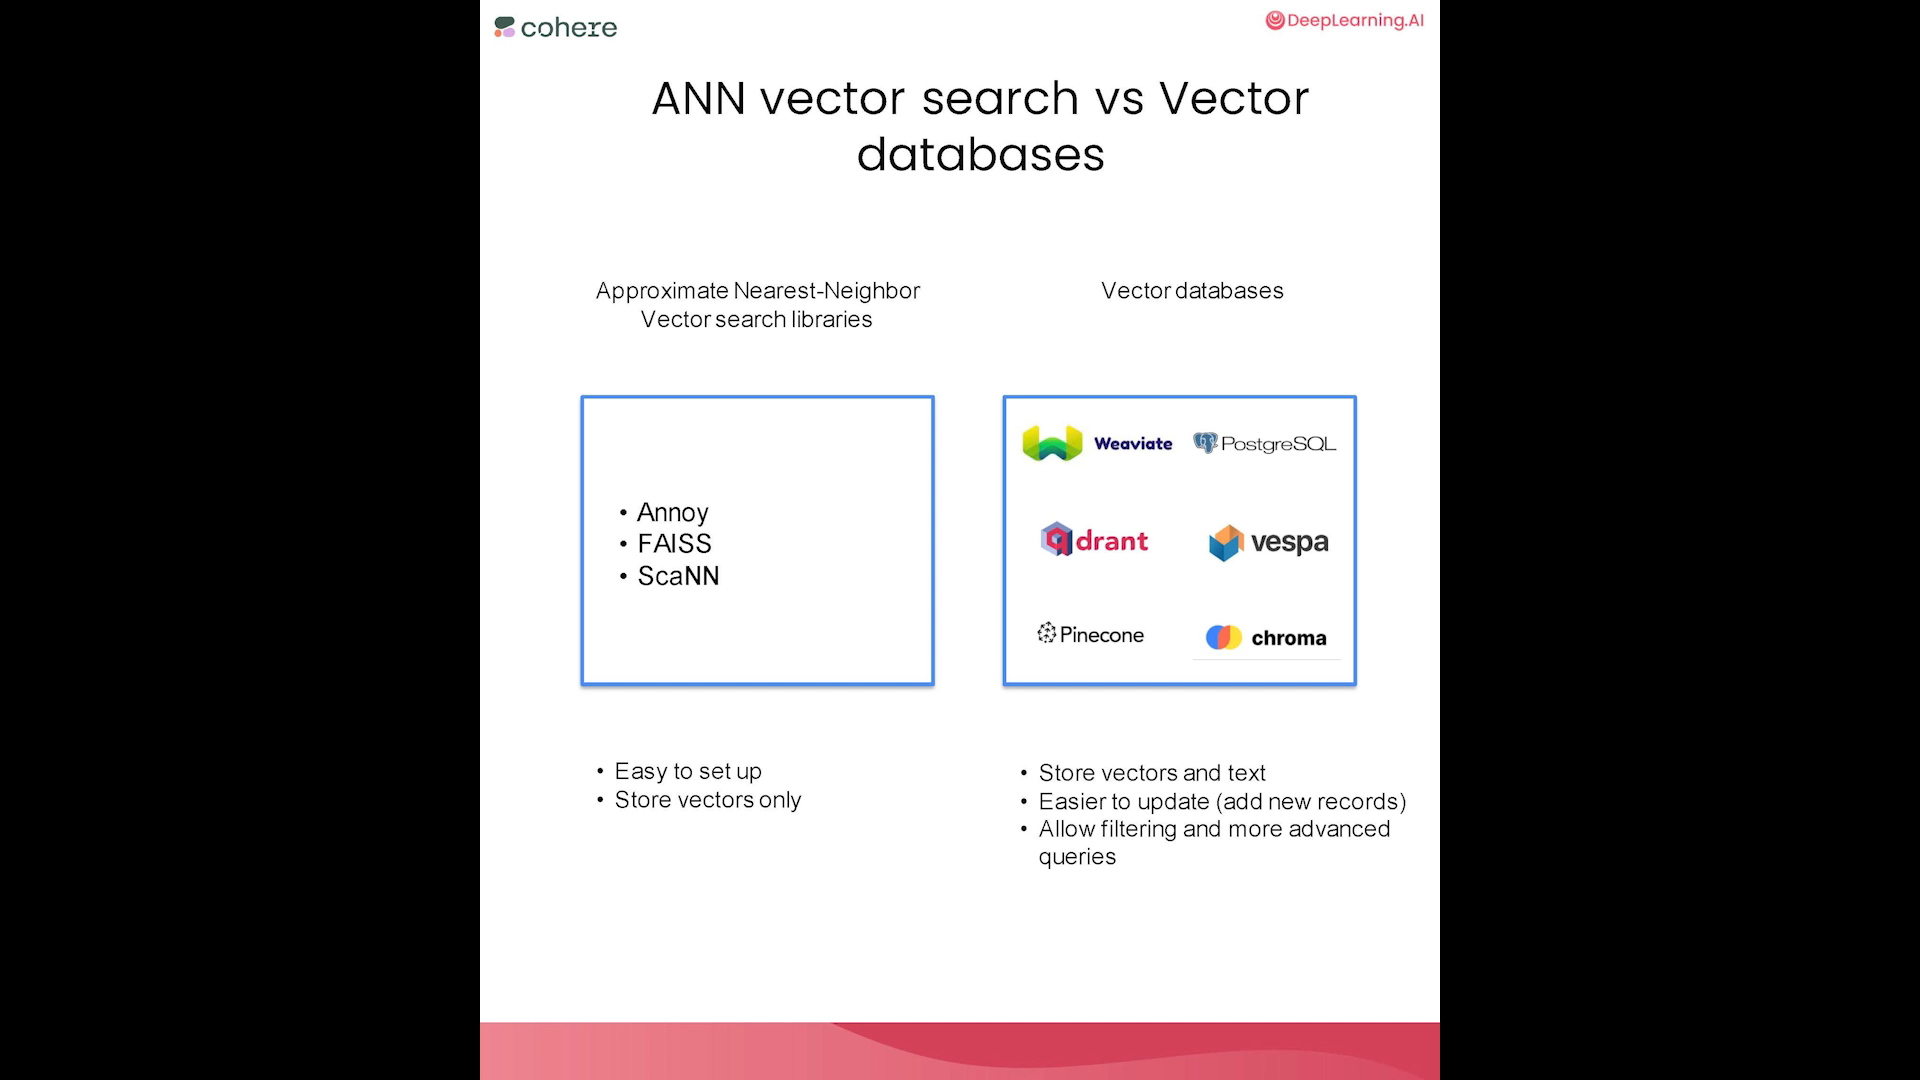

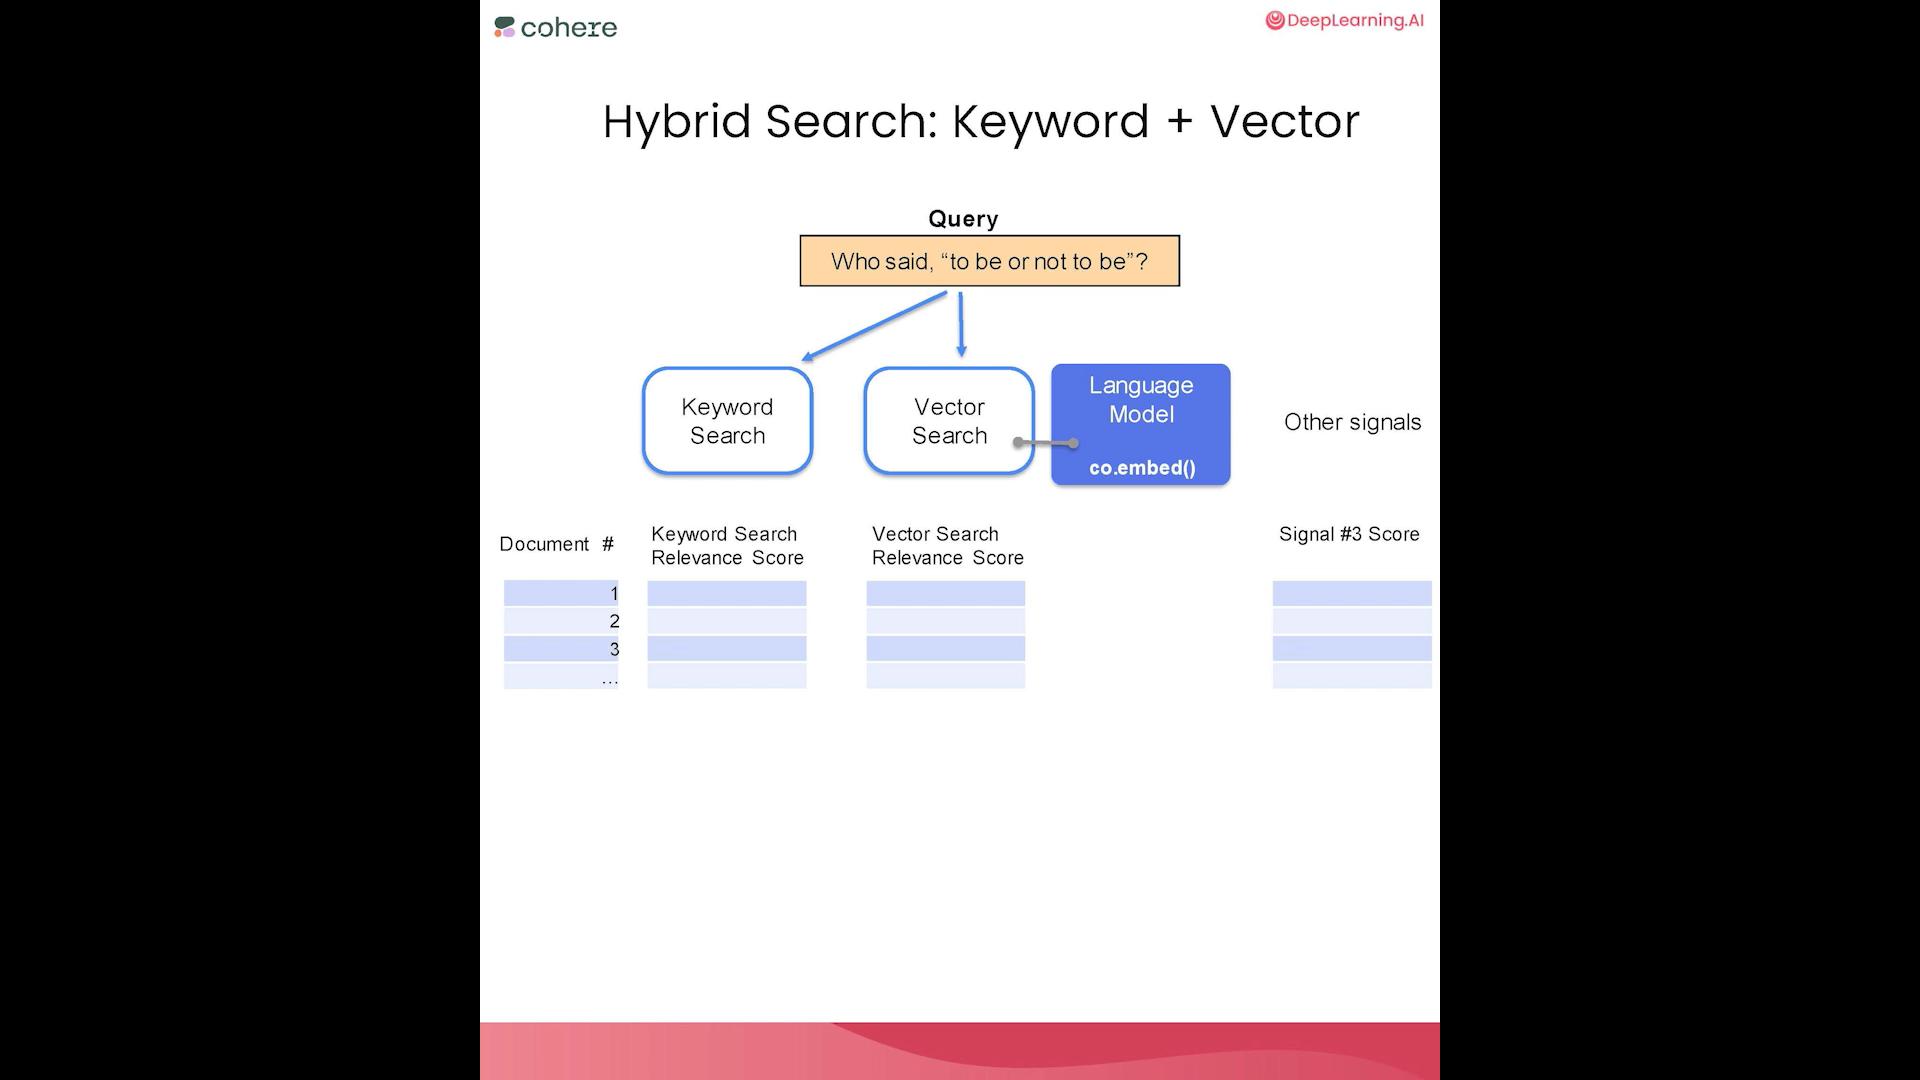

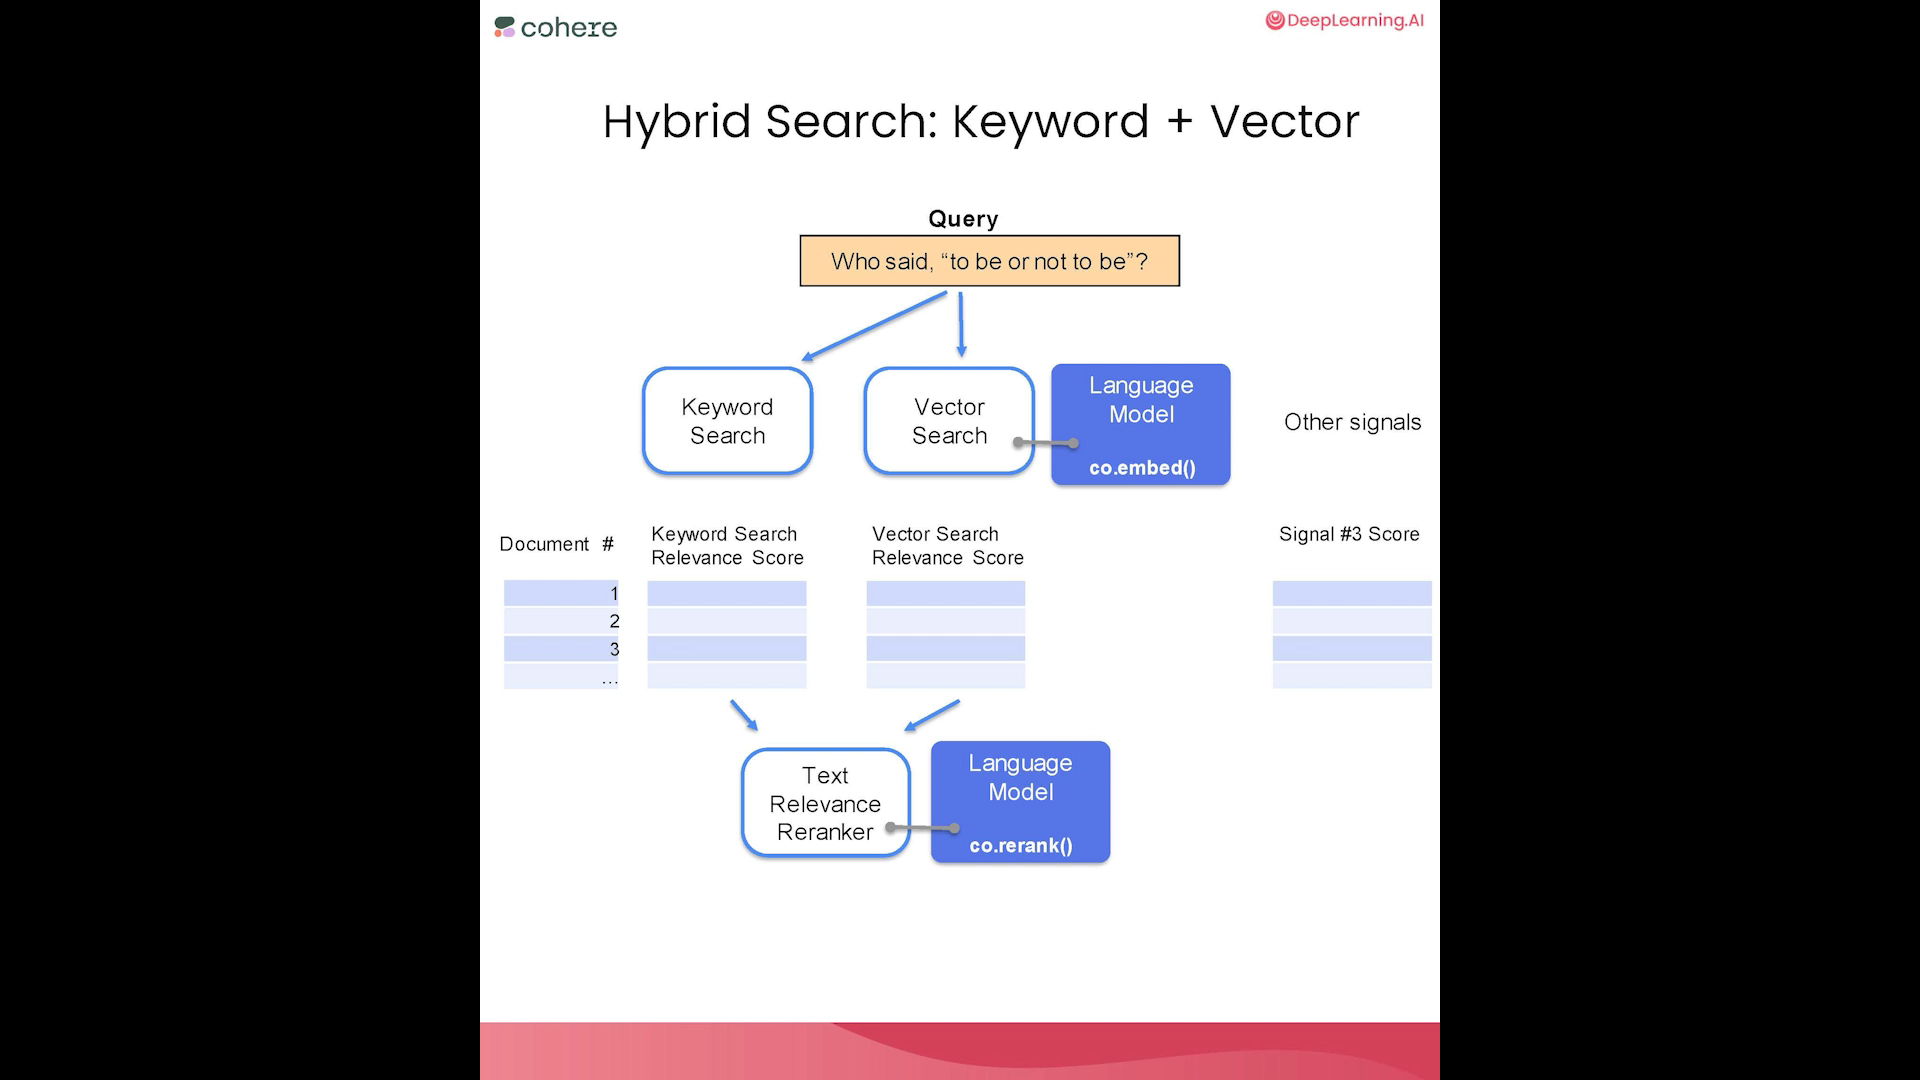